https://docs.google.com/spreadsheets/d/1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno/edit?usp=drive_link

In [ ]:
! gdown 1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/data.xlsx')
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [ ]:
df_droped = df.dropna(subset='receiving_date')
df_droped = df_droped.drop(index=1)
df_droped[['status', 'sale','new/current', 'document', ]] = df_droped[['status', 'sale','new/current', 'document', ]].astype('str').copy()
df_droped['receiving_date'] = pd.to_datetime(df_droped['receiving_date'], infer_datetime_format=True).copy()
df_filtered_july = df_droped[df_droped['receiving_date'].dt.strftime('%Y-%m') == '2021-07'].copy()

In [ ]:
df_filtered_july

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
2,14.0,5452.70,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26
5,18.0,4253.70,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-07-07
6,20.0,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,NaN,оригинал,2021-07-15
12,32.0,7353.90,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-07-09
13,34.0,3892.52,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-07-09
...,...,...,...,...,...,...,...,...
251,273.0,10133.70,ОПЛАЧЕНО,Петрова,текущая,NaN,оригинал,2021-07-06
252,277.0,4798.70,ОПЛАЧЕНО,Филимонова,текущая,NaN,оригинал,2021-07-08
253,281.0,5733.70,ОПЛАЧЕНО,Селиванов,текущая,NaN,оригинал,2021-07-22
254,282.0,953.70,ОПЛАЧЕНО,Селиванов,новая,NaN,оригинал,2021-07-16


In [ ]:
# 1
df_filtered_july[df_filtered_july['status'] != 'ПРОСРОЧЕНО']['sum'].sum()

757830.7399999996

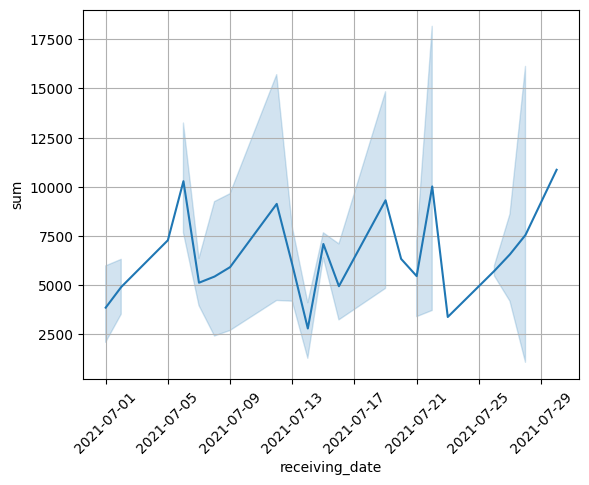

In [ ]:
# 2
sns.lineplot(y=df_filtered_july['sum'], x=df_filtered_july['receiving_date'])
plt.xticks(rotation=45)
plt.grid()


Даже не могу что та сказать основном выручка от 5000 до 10000 начало месяц было очень маленькая выручка в конце месяц растёт иногда резко падает наверно это чем то связано

In [ ]:
# 3
df_filtered_september = df_droped[df_droped['receiving_date'].dt.strftime('%Y-%m') == '2021-09'].copy()
df_sale = df_filtered_september.groupby(by='sale').sum().sort_values(by='sum', ascending=False).copy()
df_sale.iloc[0]

<ipython-input-27-2700b63704b2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sale = df_filtered_september.groupby(by='sale').sum().sort_values(by='sum', ascending=False).copy()


client_id       4661.00
sum           219240.12
Unnamed: 5         0.00
Name: Петрова, dtype: float64

In [ ]:
df_sale.iloc[0]

sale            Петрова
client_id        4661.0
sum           219240.12
Unnamed: 5          0.0
Name: 0, dtype: object

In [ ]:
# 4
df_filtered_oktober = df_droped[df_droped['receiving_date'].dt.strftime('%Y-%m') == '2021-10']
df_filtered_oktober['new/current'].value_counts()

текущая    105
новая       17
Name: new/current, dtype: int64

In [ ]:
# 5
df_filtered_mai = df_droped[df_droped['receiving_date'].dt.strftime('%Y-%m') == '2021-05']
df_filtered_mai['document'].value_counts()

оригинал    4
Name: document, dtype: int64

In [ ]:
# 1
df_1 = df_filtered_july[(df_filtered_july['status'] == 'ОПЛАЧЕНО') &
 (df_filtered_july['document'] == 'оригинал') & (df['new/current'] == 'новая')].copy()
df_1.groupby(by='sale').sum()['sum']/100*7

<ipython-input-33-4ef8e132f86b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df_filtered_july[(df_filtered_july['status'] == 'ОПЛАЧЕНО') &
<ipython-input-33-4ef8e132f86b>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1.groupby(by='sale').sum()['sum']/100*7


sale
Петрова        381.689
Селиванов     4336.913
Смирнов        213.759
Филимонова     270.809
Name: sum, dtype: float64

In [ ]:
# 2
df_2 = df_filtered_july[(df_filtered_july['status'] !='ПРОСРОЧЕНО') &
 (df_filtered_july['document'] == 'оригинал') & (df['new/current'] == 'текущая')].copy()
df_2[df['sum'] > 10000].groupby(by='sale').sum()['sum']/100*5

<ipython-input-34-5e209d780be1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df_filtered_july[(df_filtered_july['status'] !='ПРОСРОЧЕНО') &
<ipython-input-34-5e209d780be1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df['sum'] > 10000].groupby(by='sale').sum()['sum']/100*5
<ipython-input-34-5e209d780be1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2[df['sum'] > 10000].groupby(by='sale').sum()['sum']/100*5


sale
Андреев    2141.255
Иванов     2158.805
Петрова    2289.855
Смирнов    3528.680
Name: sum, dtype: float64

In [ ]:
df_2[df['sum'] < 10000].groupby(by='sale').sum()['sum']/100*3

<ipython-input-123-b67f653583b4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df['sum'] < 10000].groupby(by='sale').sum()['sum']/100*3
<ipython-input-123-b67f653583b4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2[df['sum'] < 10000].groupby(by='sale').sum()['sum']/100*3


sale
Андреев       1539.7467
Васильев       479.8560
Иванов        1921.6590
Кузнецова     3258.9336
Петрова       2836.3344
Селиванов      960.7770
Смирнов       1942.2300
Филимонова     836.2545
Name: sum, dtype: float64